In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from contextlib import redirect_stdout


(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Number of training images: " + str(x_train.shape[0]))
print("Number of test images: " + str(x_test.shape[0]))

print(x_train.shape)
print(y_train.shape)

x_train=x_train/255
x_test=x_test/255


neural_net = tf.keras.Sequential()
neural_net.add(tf.keras.layers.Flatten(input_shape=(28,28)))
neural_net.add(tf.keras.layers.Dense(16, activation='relu'))
neural_net.add(tf.keras.layers.Dense(16, activation='relu'))
neural_net.add(tf.keras.layers.Dense(10, activation='softmax'))

neural_net.summary()

neural_net.compile('adam', loss='categorical_crossentropy',metrics=['accuracy'])
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)
model_history = neural_net.fit(x_train, y_train,validation_split=.2,batch_size=32,epochs=10)

11490434/11490434 [==============================] - 0s 0us/step
Number of training images: 60000
Number of test images: 10000
(60000, 28, 28)
(60000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13002 (50.79 KB)
Trainable params: 13002 (50.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


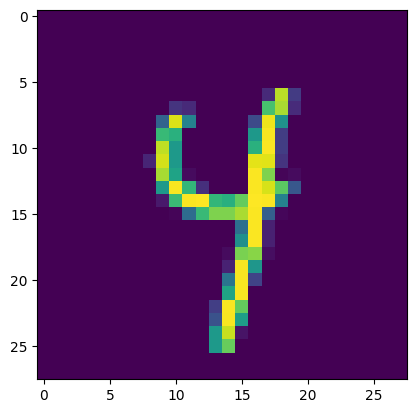

In [3]:
testing_index = 26
input = x_train[testing_index]
plt.imshow(input)
plt.show()


In [6]:
neural_net.save('sample1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
input_data = x_train[testing_index].reshape(1, 28, 28)
x_train_testing_list = x_train[testing_index].flatten().tolist()

def get_layer_outputs(model, input_data):
    layer_outputs = [layer.output for layer in model.layers]
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
    return activation_model.predict(input_data)

layer_outputs = get_layer_outputs(neural_net, input_data)

with open('predicted_result.txt', 'w') as file:
    # Write the flattened input data to the file
    file.write(f"{x_train_testing_list}\n\n")

    # Write the layer outputs to the file
    for layer_index, layer_output in enumerate(layer_outputs):
        num_nodes = layer_output.shape[-1]
        file.write(f"Layer {layer_index + 1} output:\n")
        for node_index in range(num_nodes):
            file.write(f"v_{layer_index + 1}_{node_index + 1}: {layer_output[0][node_index]}\n")
        file.write("\n")

1/1 [==============================] - 0s 132ms/step


In [13]:
def parse_keras_model(file_path):
    model = tf.keras.models.load_model(file_path)
    print("Input shape:", model.input_shape)
    print("Output shape:", model.output_shape)

    input_shape = model.input_shape

    dimensions = input_shape[1:]
    first_layer_nodes = 1
    for dim in dimensions:
        first_layer_nodes *= dim
    print(first_layer_nodes)


    l = []
    weights = []
    biases = []
    weights.append([])
    for i in range(first_layer_nodes):
        weights[0].append([])
    biases.append([])

    l.append(first_layer_nodes)

    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Dense):
            l.append(layer.units)
            weight_matrix = layer.get_weights()[0]
            bias_vector = layer.get_weights()[1]
            weights.append(weight_matrix.T.tolist())  # Transpose the weight matrix and convert to list
            biases.append(bias_vector.tolist())

    print(l)

    n=len(l)
    with open('neural_network_weights_biases.txt', 'w') as f:
        f.write(f'n={n}\n')
        f.write(f'l={l}\n')
        f.write("weights=")
        f.write(str(weights) + '\n')
        f.write("biases=")
        f.write(str(biases) + '\n')
    return n,l, weights, biases


file_path = 'sample1.h5'
n,l, weights, biases = parse_keras_model(file_path)

Input shape: (None, 28, 28)
Output shape: (None, 10)
784
[784, 16, 16, 10]
